In [6]:
cd "/content/sample_data"

/content/sample_data


In [78]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24 #rc: runtime configuration

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [79]:
data = pd.read_csv('Energy_and_Water_Data.csv')

In [80]:
data

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

In [81]:
data = data.replace({'Not Available': np.nan})
for col in list(data.columns): #column label에서 숫자타입으로 바꿔주어야 할 것들
    # Select columns that should be numeric
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Convert the data type to float
        data[col] = data[col].astype(float)

In [82]:
data = data.rename(columns = {'ENERGY STAR Score': 'score'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

In [83]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [84]:
missing_values_table(data)

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.


,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


In [85]:
missing_df = missing_values_table(data)
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.
We will remove 11 columns.


In [86]:
data = data.drop(columns = list(missing_columns))

In [87]:
missing_values_table(data)

Your selected dataframe has 49 columns.
There are 35 columns that have missing values.


,Missing Values,% of Total Values
Metered Areas (Water),4609,39.2
Water Intensity (All Water Sources) (gal/ft²),3984,33.9
Water Use (All Water Sources) (kgal),3984,33.9
NTA,2263,19.3
Census Tract,2263,19.3
Council District,2263,19.3
Community Board,2263,19.3
Longitude,2263,19.3
Latitude,2263,19.3
score,2104,17.9


In [88]:
data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [89]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(50)

2069        929.0
2514        930.7
171         992.6
4046       1000.6
8924       1005.1
11504      1029.7
8          1138.3
5801       1145.6
10175      2001.8
541        2025.2
9057       2564.4
1589       3576.6
3532       3995.4
62         4377.4
3100       4651.5
2367       4770.0
3636       5972.3
3332       8084.2
3306       8311.8
123        9915.6
7593      12316.2
3665      13145.4
2303      14195.9
11186     15059.3
11189     16519.6
1256      17133.2
564       17193.4
2251      18235.7
546       18368.1
10710     18459.5
1276      19313.5
3163      22259.0
1595      24541.2
6885      25789.4
2155      26451.7
3265      28373.6
847       34326.8
3373      49340.7
3139      50621.6
2262      50823.6
3173      51328.8
3170      51831.2
3383      78360.1
8269      84969.6
3263      95560.2
8268     103562.7
8174     112173.6
3898     126307.4
7        143974.4
8068     869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

In [90]:
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

iqr = third_quartile - first_quartile

data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]
data

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
12,15,2637863,Cadman Towers,2637863,Cadman Towers,3002320001;3002380035,3002320001;3002380035,3001727;3319420,101 Clark St,11201,NaN,NaN,NaN,NaN,Multifamily Housing,"Multifamily Housing, Other, Parking",Multifamily Housing,412503.0,1903,2,100,Whole Building,Whole Building,93.0,32.0,NaN,7.5,0.0,NaN,2047200.0,20472.0,11241926.1,3249755.2,1194.0,150.8,1043.2,432503.0,22061.0,51.01,87.9,04/28/2017 04:07:55 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN
17,20,2777309,Barnard College,2777309,Barnard College,1019890001,1-01989-0001,1082351;1079204;1082351;1082347;1079205;1082350,3009 Broadway,10029,NaN,NaN,NaN,NaN,College/University,"College/University, Residence Hall/Dormitory",College/University,323000.0,1907,7,100,Whole Building,NaN,NaN,120.0,125.2,8.7,0.9,193.6,52441239.4,556997.6,17958140.6,5217062.4,4554.7,2888.2,1666.5,598000.0,NaN,NaN,188.7,05/01/2017 12:50:51 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN
18,21,2780056,720-730 Ft. Washington Owners Corp.,2780056,720-730 Ft. Washington Owners Corp.,1021800614;1021800628,1021800614;1021800628,1064475;1064476;1803806,720-730 Ft. Washington Ave.,10040,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,Multifamily Housing,321464.0,1939,2,100,Whole Building,Whole Building,72.0,76.2,79.9,3.5,0.0,106.2,880200.0,8906.3,3968641.7,1121931.8,1893.4,1525.1,368.3,321464.0,5915.6,18.40,103.3,05/01/2017 10:09:31 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN
19,22,4988574,- 720 Ft. Washington Ave. bldg,2780056,720-730 Ft. Washington Owners Corp.,1021800614,1021800614,1064475,720-730 Ft. Washington Ave.,10040,720,FT WASHINGTON AVENUE,Manhattan,179130.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,204720.0,1939,1,100,Whole Building,NaN,67.0,75.7,79.0,4.0,0.0,109.1,553439.4,5604.4,2886852.2,820016.2,1204.4,936.5,267.9,204720.0,NaN,NaN,106.6,05/01/2017 10:09:31 PM,NaN,In Compliance,40.857943,-73.934962,12.0,10.0,281.0,Washington Heights North ...
20,23,4988569,- 730 Ft. Washington Ave bldg,2780056,720-730 Ft. Washington Owners Corp.,1021800628,1021800628,1064476;1803806,720-730 Ft. Washington Ave.,10040,730,FT WASHINGTON AVENUE,Manhattan,102150.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,116744.0,1939,1,100,Whole Building,NaN,80.0,77.1,82.7,2.6,0.0,102.8,326760.6,3301.9,1081789.4,308074.6,689.0,588.6,100.4,116744.0,NaN,NaN,97.7,05/01/2017 10:09:31 PM,Yes,In Compliance,40.858256,-73.934734,12.0,10.0,281.0,Washington Heights North ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11741,14988,4940453,Advanced: 24 Monroe Place,Not Applicable

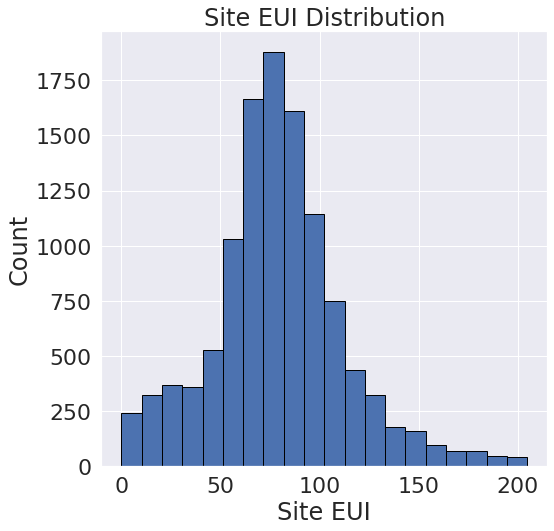

In [91]:
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

In [92]:
features = data.copy()
numeric_subset = data.select_dtypes('number')

for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

categorical_subset = data[['Borough', 'Largest Property Use Type']]
categorical_subset = pd.get_dummies(categorical_subset)
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [93]:
features.shape
features

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract,log_Order,log_Property Id,log_DOF Gross Floor Area,log_Largest Property Use Type - Gross Floor Area (ft²),log_Year Built,log_Number of Buildings - Self-reported,log_Occupancy,log_Site EUI (kBtu/ft²),log_Weather Normalized Site EUI (kBtu/ft²),log_Weather Normalized Site Electricity Intensity (kWh/ft²),log_Weather Normalized Site Natural Gas Intensity (therms/ft²),...,Largest Property Use Type_Financial Office,Largest Property Use Type_Hospital (General Medical & Surgical),Largest Property Use Type_Hotel,Largest Property Use Type_K-12 School,Largest Property Use Type_Library,Largest Property Use Type_Mailing Center/Post Office,Largest Property Use Type_Manufacturing/Industrial Plant,Largest Property Use Type_Medical Office,Largest Property Use Type_Movie Theater,Largest Property Use Type_Multifamily Housing,Largest Property Use Type_Museum,Largest Property Use Type_Non-Refrigerated Warehouse,Largest Property Use Type_Office,Largest Property Use Type_Other,Largest Property Use Type_Other - Education,Largest Property Use Type_Other - Entertainment/Public Assembly,Largest Property Use Type_Other - Lodging/Residential,Largest Property Use Type_Other - Mall,Largest Property Use Type_Other - Public Services,Largest Property Use Type_Other - Recreation,Largest Property Use Type_Other - Services,Largest Property Use Type_Other - Specialty Hospital,Largest Property Use Type_Outpatient Rehabilitation/Physical Therapy,Largest Property Use Type_Parking,Largest Property Use Type_Performing Arts,Largest Property Use Type_Pre-school/Daycare,Largest Property Use Type_Refrigerated Warehouse,"Largest Property Use Type_Repair Services (Vehicle, Shoe, Locksmith, etc.)",Largest Property Use Type_Residence Hall/Dormitory,Largest Property Use Type_Residential Care Facility,Largest Property Use Type_Restaurant,Largest Property Use Type_Retail Store,Largest Property Use Type_Self-Storage Facility,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility
12,15,2637863,NaN,412503.0,1903,2,100,93.0,32.0,NaN,7.5,0.0,NaN,2047200.0,20472.0,11241926.1,3249755.2,1194.0,150.8,1043.2,432503.0,22061.0,51.01,87.9,NaN,NaN,NaN,NaN,NaN,2.708050,14.785480,NaN,12.929999,7.551187,0.693147,4.605170,3.465736,NaN,2.014903,-inf,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,20,2777309,NaN,323000.0,1907,7,100,NaN,120.0,125.2,8.7,0.9,193.6,52441239.4,556997.6,17958140.6,5217062.4,4554.7,2888.2,1666.5,598000.0,NaN,NaN,188.7,NaN,NaN,NaN,NaN,NaN,2.995732,14.836993,NaN,12.685408,7.553287,1.945910,4.605170,4.787492,4.829912,2.163323,-0.105361,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18,21,2780056,NaN,321464.0,1939,2,100,72.0,76.2,79.9,3.5,0.0,106.2,880200.0,8906.3,3968641.7,1121931.8,1893.4,1525.1,368.3,321464.0,5915.6,18.40,103.3,NaN,NaN,NaN,NaN,NaN,3.044522,14.837982,NaN,12.680641,7.569928

In [94]:
def remove_collinear_features(x, threshold):    
    # score 값은 제외하고 처리
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # correlation matrix 계산
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['score'] = y
               
    return x

In [95]:
features = remove_collinear_features(features, 0.6);

In [96]:
features  = features.dropna(axis=1, how = 'all')
features.shape

(11319, 65)

In [97]:
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(1858, 65)
(9461, 65)


In [102]:
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

train_features = X
test_features = X_test
train_labels = y
test_labels = y_test

(6622, 64)
(2839, 64)
(6622, 1)
(2839, 1)


In [103]:
#1
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Imputing missing values and scaling values
from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import imputer
# 이것은 서비스 종료함
# 주석처리되지 않은 걸로 해야됨

from sklearn.preprocessing import MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Evaluation
from sklearn.metrics import mean_absolute_error

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [104]:
imputer = SimpleImputer(strategy='median')

# Train on the training features
imputer.fit(train_features)

# Transform both training data and testing data
# 이 결과는 ndarray임
# y 값은 앞서 nan 값을 모두 drop 했기 떄문에 X, 즉, feature에 대한 처리 수행
X_train = imputer.transform(train_features)
X_test = imputer.transform(test_features)

In [106]:
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [107]:
y_train = np.array(train_labels).flatten()
y_test = np.array(test_labels).flatten()

In [108]:
#7
# LinearRegression, 선형 회귀
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_pred)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 13.4651


In [109]:
#9
# Support Vector Regression, SVM회귀
svm = SVR(C = 1000, gamma = 0.1)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_mae = mean_absolute_error(y_test, svm_pred)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 10.9337


In [113]:
#8
# KNeighborsRegression, KNN 회귀
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_mae = mean_absolute_error(y_test, knn_pred)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 13.0131


In [110]:
#10
# RandomForestRegression, 랜덤포레스트회귀
rf = RandomForestRegressor(random_state=60)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % rf_mae)

Random Forest Regression Performance on the test set: MAE = 9.5231


In [111]:
#11
# GradientBoostingRegression, 
gb = GradientBoostingRegressor(random_state=60)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_pred)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gb_mae)

Gradient Boosted Regression Performance on the test set: MAE = 10.0116


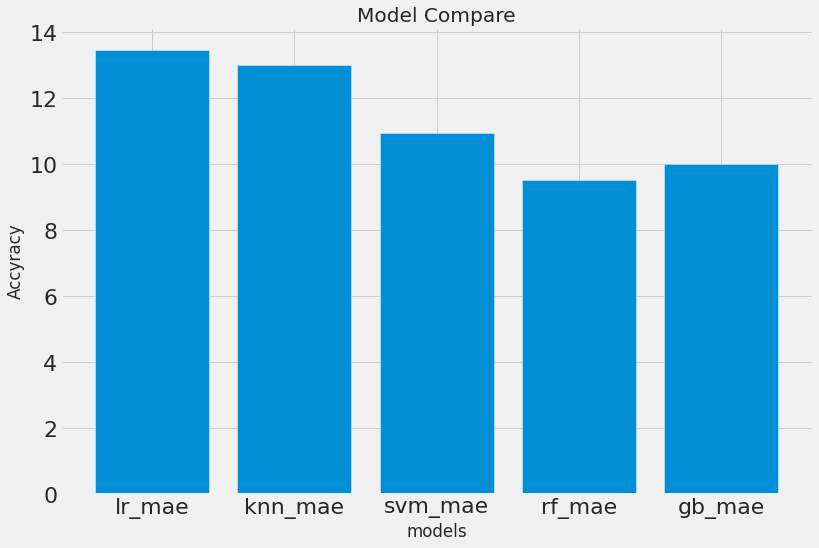

In [114]:
#12
# 예측한 모델들의 mae를 비교
# 앞서 mean(평균)으로 비교했을때 24.5164

# Bar graph로 성능 비교하기
figsize(12, 8)
plt.style.use('fivethirtyeight')
# 축을 변경할 땐 barh
plt.bar(['lr_mae', 'knn_mae', 'svm_mae', 'rf_mae', 'gb_mae'], [lr_mae, knn_mae, svm_mae, rf_mae, gb_mae]);
plt.xlabel('models'); plt.ylabel('Accyracy'); 
plt.title('Model Compare');